In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/dstoc/Documents/Python Scripts/Fixed Income Dashboards/reduced_data_cleaned.csv')

In [2]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt


df2 = df.copy()

# Assuming 'Date' is the name of the column containing date information
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(axis = 1)

# Define the features (independent variables) and target (dependent variable)
features = list(df2)
# Define the lag order (number of lags to create)
lag_order = 6  # Example: Creating lagged values for the past n periods
# Define the initial training size (e.g., 70% of the data)
initial_train_size = int(0.7 * len(df2)) - lag_order
InSamp_length = len(df2) - initial_train_size - lag_order


In [3]:

# Define the number of periods to lead the target variable (1 period in this case)
lead_periods = 1

# redefine the features (independent variables) and target (dependent variable)
features = list(df2)

# Create a new variable representing the 'lead' of the target
df2['YIELD_weekly_percent_change_10 YR_lead'] = df2['YIELD_weekly_percent_change_10 YR'].shift(-lead_periods)

# Drop rows with missing values in the features or target (created by the shift)
df2 = df2.dropna(subset=features + ['YIELD_weekly_percent_change_10 YR_lead'])

In [4]:
df2['YIELD_weekly_percent_change_10 YR'].tail()

Date
2023-10-22    0.064795
2023-10-29   -0.018256
2023-11-05   -0.055785
2023-11-12    0.008753
2023-11-19   -0.036876
Name: YIELD_weekly_percent_change_10 YR, dtype: float64

In [5]:
df3 = df2.copy()
features = list(df3.select_dtypes(include=['float64', 'int64']).columns)[0:(len(df3.columns)-1)]
X = df3[features]
y = df3['YIELD_weekly_percent_change_10 YR_lead']


In [6]:
df3 = df2.copy()
features = list(df3.columns)[0:(len(df3.columns)-1)]
X = df3[features]
y = df3['YIELD_weekly_percent_change_10 YR_lead']

target_var = 'YIELD_weekly_percent_change_10 YR_lead'

if target_var.lower() in map(str.lower, X.columns):
    print(f"The DataFrame contains the column '{target_var}'.")
else:
    print(f"The DataFrame X does not contain the target variable: '{target_var}'.")

The DataFrame X does not contain the target variable: 'YIELD_weekly_percent_change_10 YR_lead'.


Spearman's rank correlation is often used when the variables being compared may not have a linear relationship or when the assumptions of parametric correlation measures like Pearson's correlation are not met.

In [7]:
df3.iloc[:InSamp_length,].tail()

,YIELD_weekly_percent_change_6 MO,YIELD_weekly_percent_change_1 YR,YIELD_weekly_percent_change_2 YR,YIELD_weekly_percent_change_3 YR,YIELD_weekly_percent_change_5 YR,YIELD_weekly_percent_change_7 YR,YIELD_weekly_percent_change_10 YR,YIELD_weekly_percent_change_20 YR,YIELD_weekly_percent_change_30 YR,UST_BOND_FU_weekly_percent_change_Open Interest,...,AUD_FO_weekly_percent_change_Commercial Short,AUD_FO_weekly_percent_change_Total Long,AUD_FO_weekly_percent_change_Total Short,AUD_FO_weekly_percent_change_Nonreportable Positions Long,AUD_FO_weekly_percent_change_Nonreportable Positions Short,SOMA_weekly_percent_change_tips,SOMA_weekly_percent_change_tipsInflationCompensation,SOMA_weekly_percent_change_notesbonds,SOMA_weekly_percent_change_total,YIELD_weekly_percent_change_10 YR_lead
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-14,0.400000,0.000000,-0.285714,-0.346939,-0.219512,-0.183246,-0.131783,-0.071633,-0.026178,-0.004792,...,-0.301706,-0.196299,-0.269874,-0.189682,0.357707,0.006517,0.008566,0.002143,0.001417,-0.075893
2011-08-21,-0.428571,-0.090909,0.000000,0.062500,-0.062500,-0.083333,-0.075893,-0.083333,-0.088710,-0.008830,...,-0.048613,0.035299,-0.063064,-0.210482,0.109795,0.000000,-0.001934,0.001876,-0.001354,0.057971
2011-08-28,-0.500000,-0.100000,0.000000,-0.029412,0.044444,0.062937,0.057971,0.053872,0.044248,0.021724,...,0.202267,0.089482,0.117490,0.049925,-0.039729,0.000000,-0.001940,0.000528,-0.000107,-0.077626
2011-09-04,1.500000,0.111111,0.000000,0.000000,-0.063830,-0.072368,-0.077626,-0.067093,-0.062147,0.050251,...,0.063076,0.055818,0.110064,0.133626,-0.077249,0.012222,0.009498,0.001790,-0.001445,-0.044554
2011-09-11,0.000000,0.100000,-0.150000,-0.060606,-0.079545,-0.049645,-0.044554,-0.020548,-0.018072,-0.067396,...,0.083508,0.093430,0.137267,0.087474,-0.118270,0.000000,0.001656,0.002228,0.001316,0.077720


In [8]:
import pandas as pd

def select_top_variables(df, target_variable, num_variables):
    # Calculate the rank correlation (Spearman's rho) with the target variable
    correlation_matrix = df.corrwith(df[target_variable], method='spearman')
    
    # Sort variables based on absolute correlation values
    sorted_variables = correlation_matrix.abs().sort_values(ascending=False)
    
    # Select the top variables
    selected_variables = sorted_variables.index[:num_variables]
    
    # Extract the correlation values for the selected variables
    selected_correlations = correlation_matrix[selected_variables]
    
    # Create a DataFrame to store the results
    corr_data = pd.DataFrame({
        'Variable': selected_variables,
        'Correlation': selected_correlations
    })
    
    return corr_data

# Assuming df3 is your DataFrame and 'YIELD_weekly_percent_change_10 YR' is the target variable
correlated_variables = select_top_variables(df3.loc[df3.index[:InSamp_length]], 'YIELD_weekly_percent_change_10 YR_lead', 200)


In [9]:
df3.loc[df3.index[:InSamp_length], correlated_variables['Variable']].head()

,YIELD_weekly_percent_change_10 YR_lead,UST_10Y_FO_weekly_percent_change_Non Reportable Shorts,UST_10Y_FU_weekly_percent_change_Non Reportable Longs,UST_10Y_FU_weekly_percent_change_Non Reportable Shorts,UST_10Y_FO_weekly_percent_change_Non Reportable Longs,NATGAS_FO_weekly_percent_change_Noncommercial Long,YEN_FU_weekly_percent_change_Nonreportable Positions Short,UST_10Y_FU_weekly_percent_change_Open Interest,YEN_FO_weekly_percent_change_Nonreportable Positions Short,UST_10Y_FO_weekly_percent_change_Asset Manager Longs,...,YEN_FO_weekly_percent_change_Nonreportable Positions Long,CHF_FO_weekly_percent_change_Open Interest,UST_10Y_FO_weekly_percent_change_Dealer Shorts,SP500_eMini_FU_weekly_percent_change_Other Reportable Longs,PESO_FU_weekly_percent_change_Nonreportable Positions Short,CAD_FU_weekly_percent_change_Open Interest,WTI_PHYS_FO_weekly_percent_change_Noncommercial Long,UST_2Y_FU_weekly_percent_change_Asset Manager Longs,UST_2Y_FU_weekly_percent_change_Dealer Longs,CHF_FO_weekly_percent_change_Nonreportable Positions Long
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-25,-0.015296,0.075506,0.039976,0.039968,0.045921,-0.087035,-0.284957,0.096635,-0.277764,0.186905,...,-0.267675,-0.530200,-0.177814,0.646770,-0.053279,-0.048270,-0.057170,0.080200,-0.000314,-0.185829
2006-07-02,-0.001942,-0.053162,-0.031766,-0.012708,-0.068202,0.067602,0.098720,0.046394,0.084128,0.061635,...,0.005438,0.104444,0.257053,-0.058857,0.125108,-0.272629,0.077938,-0.014777,-0.007761,0.004747
2006-07-09,-0.013619,-0.002422,-0.049494,0.002832,-0.049233,0.014390,-0.108938,-0.026388,-0.095245,-0.015988,...,0.014332,-0.072931,-0.055327,-0.203725,-0.130242,0.045105,0.074313,-0.041798,0.138786,-0.066220
2006-07-16,-0.003945,-0.022542,0.034387,-0.018527,0.046073,0.034815,-0.140593,-0.011381,-0.142315,0.055753,...,-0.019994,0.064258,0.135686,-0.288721,-0.316523,-0.009196,0.076219,0.006377,0.180686,0.049836
2006-07-23,-0.009901,-0.001156,-0.031302,-0.026084,-0.023064,-0.043627,0.322699,-0.004893,0.299812,0.004527,...,-0.053834,0.108912,-0.228154,0.650258,0.069903,-0.102852,0.006479,0.013112,0.145335,-0.093333


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Assuming X is your DataFrame containing the selected variables
#vif_results = calculate_vif(df3.iloc[:InSamp_length,[correlated_variables['Variable']]])
vif_results = calculate_vif(df3.loc[df3.index[:InSamp_length], correlated_variables['Variable']])

# Print the variables with high VIF
low_vif_variables = vif_results.sort_values('VIF')[:51]
print("Variables with low VIF:")
print(low_vif_variables)


Variables with low VIF:
                                              Variable        VIF
47      UST_BOND_FU_weekly_percent_change_Dealer Longs   3.231546
139              SOMA_weekly_percent_change_notesbonds   3.419504
185   AUD_FO_weekly_percent_change_Noncommercial Short   4.291609
21                     SOMA_weekly_percent_change_tips   4.303417
0               YIELD_weekly_percent_change_10 YR_lead   4.452752
194  PESO_FU_weekly_percent_change_Nonreportable Po...   4.469805
184  NATGAS_FO_weekly_percent_change_Nonreportable ...   4.576469
193  SP500_eMini_FU_weekly_percent_change_Other Rep...   4.670393
197  UST_2Y_FU_weekly_percent_change_Asset Manager ...   4.702151
85     UST_BOND_FO_weekly_percent_change_Dealer Shorts   4.715411
84   UST_BOND_FU_weekly_percent_change_Other Report...   4.861200
18                    SOMA_weekly_percent_change_total   4.977266
67     UST_10Y_FU_weekly_percent_change_Dealer Spreads   5.043687
198       UST_2Y_FU_weekly_percent_change_Dealer Lon

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer

# Assuming df4 is your DataFrame
df6 = df3.copy()
df6 = df6[low_vif_variables["Variable"]]
# Define your features and target variable
features = low_vif_variables["Variable"]
features2 = [feature for feature in features if feature != target_var]


for feature in features2:
    for lag in range(1, lag_order+1):
        df6[f'{feature}_lag{lag}'] = df6[feature].shift(lag)

# replace inf and -inf with na and  drops rows with missing values in the lagged variables
df6 = df6[6:]
df6 = df6.replace([np.inf, -np.inf], np.nan).dropna(axis = 1)

C:\Users\dstoc\AppData\Local\Temp\ipykernel_7980\3338893172.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[f'{feature}_lag{lag}'] = df6[feature].shift(lag)
C:\Users\dstoc\AppData\Local\Temp\ipykernel_7980\3338893172.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6[f'{feature}_lag{lag}'] = df6[feature].shift(lag)
C:\Users\dstoc\AppData\Local\Temp\ipykernel_7980\3338893172.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [12]:
df6[target_var] = np.where(df6[target_var] < 0, 'LONG', 'SHORT')
X = df6.drop(target_var, axis=1)
y = df6[target_var]

if target_var.lower() in map(str.lower, X.columns):
    print(f"The DataFrame contains the column '{target_var}'. ABORT BACK-TEST")
else:
    print(f"The DataFrame X does not contain the target variable: '{target_var}'. You may proceed with the back-test.")


The DataFrame X does not contain the target variable: 'YIELD_weekly_percent_change_10 YR_lead'. You may proceed with the back-test.


                                                                    
                                                                    ## Gridsearch performed below ##

In [14]:
# Set up the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50],
    'learning_rate': [0.01],
    'subsample': [0.75],
    'max_depth': [5,15],
    'min_samples_leaf': [2]
}

# param_grid = {
#     'n_estimators': [50],
#     'learning_rate': [0.3],
#     'subsample': [0.75],
#     'max_depth': [5,15],
#     'min_samples_leaf': [5]
# }

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=248)


ys = []

def Acc_Score(y_true,y_pred):
    global ys
    ys.append(y_pred)
    acc = accuracy_score(y_true, y_pred)    
    return acc

def scorer():
    return make_scorer(Acc_Score, greater_is_better=True)

# Create the time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=len(df6) - initial_train_size, test_size=1,gap=0, max_train_size=None)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=tscv, scoring=scorer(), verbose=1, n_jobs=-1)
grid_search.fit(X, y)

# Get the best model from the grid search
best_gbm = grid_search.best_estimator_

cv_results = pd.DataFrame(grid_search.cv_results_)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print(f'Accuracy of the Best Hyperparameters: {grid_search.best_score_:.4f}')


Fitting 272 folds for each of 16 candidates, totalling 4352 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 35, 'min_samples_leaf': 1, 'n_estimators': 200, 'subsample': 0.75}
Accuracy of the Best Hyperparameters: 0.5772


In [ ]:
param_grid2 = {
    'n_estimators': [20],
    'learning_rate': [0.1],
    'subsample': [0.75],
    'max_depth': [15,35],
    'min_samples_leaf': [1]
}
ys = []
# Perform grid search with cross-validation
grid_search2 = GridSearchCV(gbm,param_grid2, cv=tscv, scoring=scorer(), verbose=1)#, n_jobs=-1)
grid_search2.fit(X, y)
# Get the best model from the grid search
best_gbm2 = grid_search2.best_estimator_

cv_results2 = pd.DataFrame(grid_search2.cv_results_)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search2.best_params_)
print(f'Accuracy of the Best Hyperparameters: {grid_search2.best_score_:.4f}')

In [15]:
from sklearn.metrics import confusion_matrix 
#Calculate and display accuracy
accuracy_score(y[(initial_train_size):], ys[(((len(df6) - initial_train_size) * (grid_search.best_index_))):(len(df6) - initial_train_size) * (grid_search.best_index_ +1)])

0.5772058823529411

In [16]:
import joblib
# save the model to disk
filename = '10Y_UST_gridsearch_results.sav'
joblib.dump(grid_search, filename)

['10Y_UST_gridsearch_results.sav']

In [18]:
best_estim_preds = ys[(((len(df6) - initial_train_size) * (grid_search.best_index_))):(len(df6) - initial_train_size) * (grid_search.best_index_ +1)]

In [19]:
best_estim_preds = np.array(best_estim_preds).flatten().tolist()


In [20]:
joblib.dump(best_estim_preds,'10Y_UST_best_estimator_predictions.sav')

['10Y_UST_best_estimator_predictions.sav']

In [21]:
class backtest_object:
  def __init__(self,grid_search, X, y, best_estim_preds, final_model):
    self.grid_search = grid_search
    self.X = X
    self.y = y
    self.best_estim_preds = best_estim_preds
    self.final_model = best_gbm

backtest_object_10Y_UST_v1_1 = backtest_object(grid_search, X, y, best_estim_preds, best_gbm)
print(backtest_object_10Y_UST_v1_1)

import pickle

# Serialize the object using pickle and save to a file
with open('backtest_object_10Y_UST_v1_1.pkl', 'wb') as file:
    pickle.dump(backtest_object_10Y_UST_v1_1, file)
    


In [22]:
y.tail()

Date
2023-10-22     LONG
2023-10-29     LONG
2023-11-05    SHORT
2023-11-12     LONG
2023-11-19    SHORT
Name: YIELD_weekly_percent_change_10 YR_lead, dtype: object

code for predicting off of new data

In [23]:
grid_search.best_estimator_.predict(X.tail(1))

array(['SHORT'], dtype=object)

In [24]:
grid_search.best_estimator_.predict_proba(X.tail(1))

array([[0.12175561, 0.87824439]])

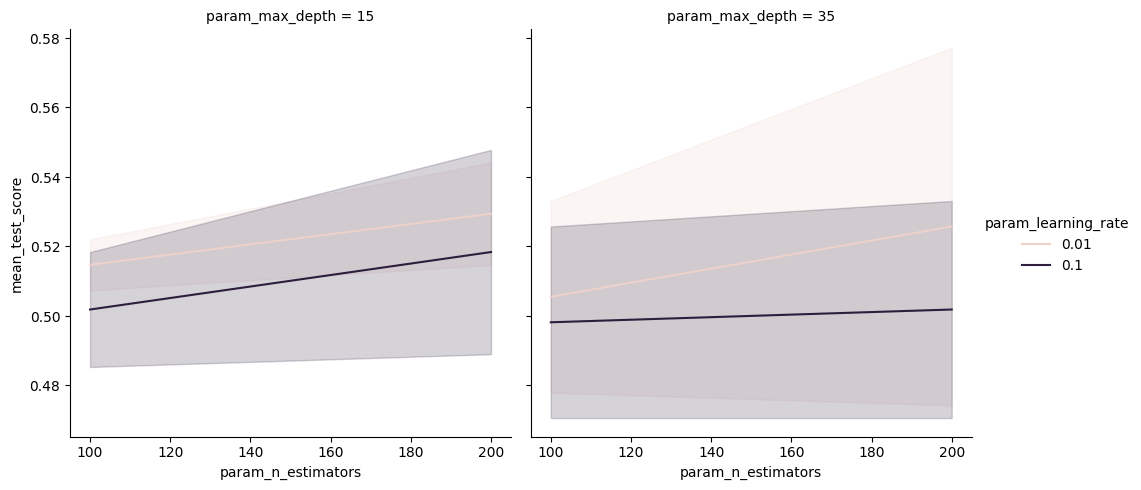

In [25]:
# https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/
import matplotlib.pyplot as plt
import seaborn as sns 
sns.relplot(data=cv_results,
 kind='line',
 x='param_n_estimators',
 y='mean_test_score',
 hue='param_learning_rate',
 col='param_max_depth')
plt.show()

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

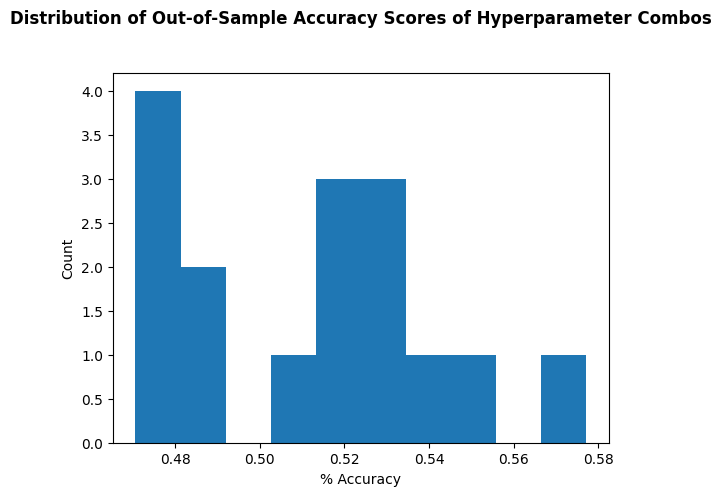

In [26]:

plt.hist(cv_results['mean_test_score'])
plt.xlabel('% Accuracy')
plt.ylabel('Count')
 
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

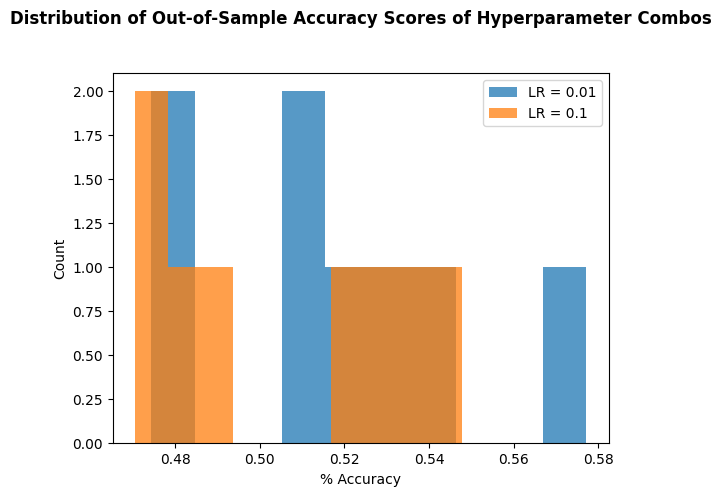

In [27]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_learning_rate == 0.01')
group2 = cv_results.query('param_learning_rate == 0.1')

plt.hist(group1['mean_test_score'], label='LR = 0.01', alpha=0.75)
plt.hist(group2['mean_test_score'], label='LR = 0.1', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

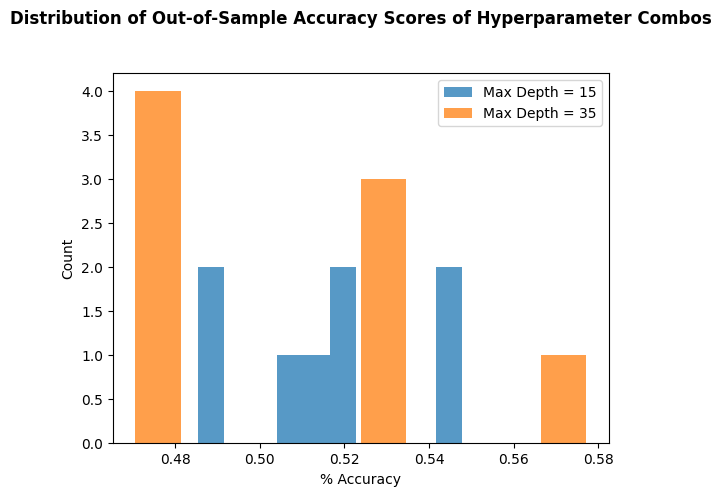

In [35]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_max_depth == 15')
group2 = cv_results.query('param_max_depth == 35')

plt.hist(group1['mean_test_score'], label='Max Depth = 15', alpha=0.75)
plt.hist(group2['mean_test_score'], label='Max Depth = 35', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

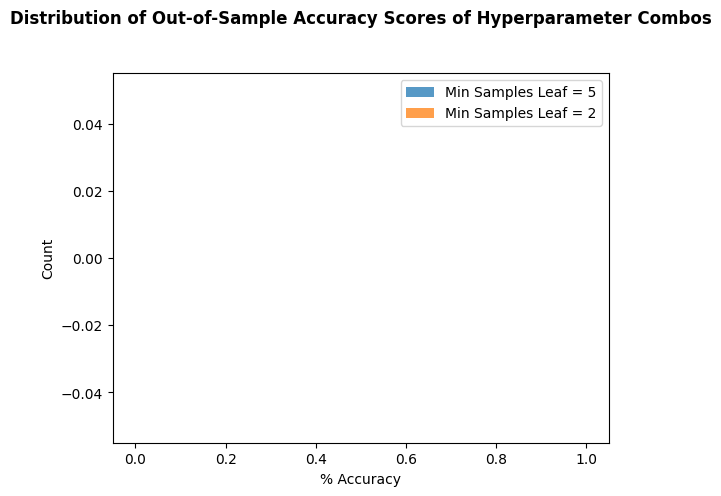

In [29]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_min_samples_leaf == 5')
group2 = cv_results.query('param_min_samples_leaf == 2')

plt.hist(group1['mean_test_score'], label='Min Samples Leaf = 5', alpha=0.75)
plt.hist(group2['mean_test_score'], label='Min Samples Leaf = 2', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

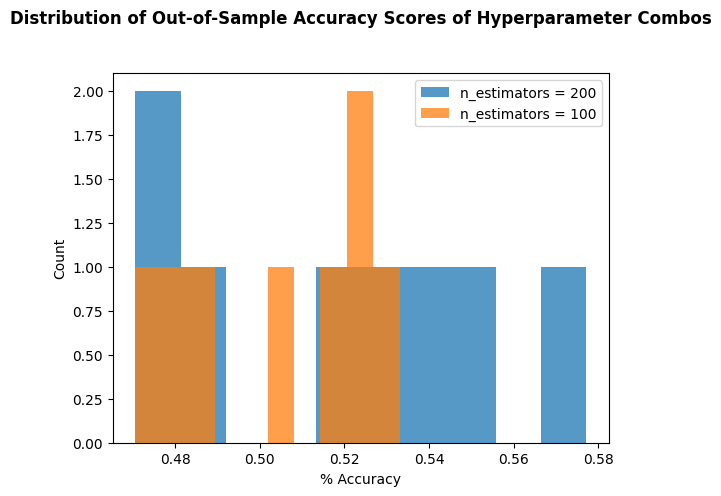

In [36]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_n_estimators == 200')
group2 = cv_results.query('param_n_estimators == 100')

plt.hist(group1['mean_test_score'], label='n_estimators = 200', alpha=0.75)
plt.hist(group2['mean_test_score'], label='n_estimators = 100', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

Text(0.5, 1.0, 'Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n')

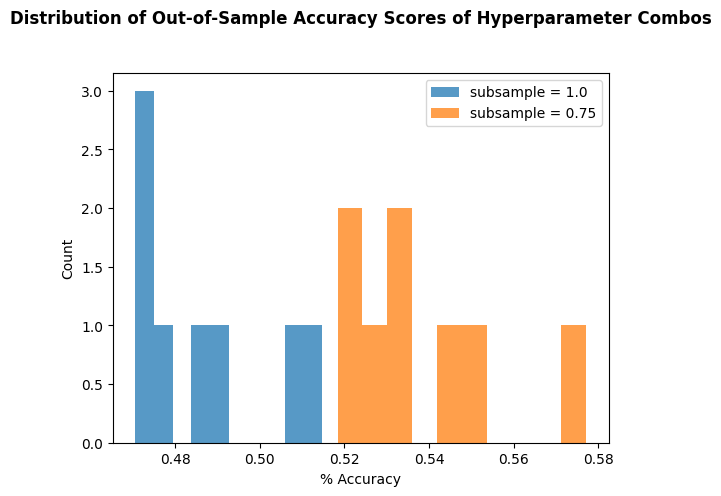

In [31]:
import matplotlib.pyplot as plt
group1 = cv_results.query('param_subsample == 1')
group2 = cv_results.query('param_subsample == .75')

plt.hist(group1['mean_test_score'], label='subsample = 1.0', alpha=0.75)
plt.hist(group2['mean_test_score'], label='subsample = 0.75', alpha=0.75)
plt.xlabel('% Accuracy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Out-of-Sample Accuracy Scores of Hyperparameter Combos\n\n',
          fontweight = "bold")

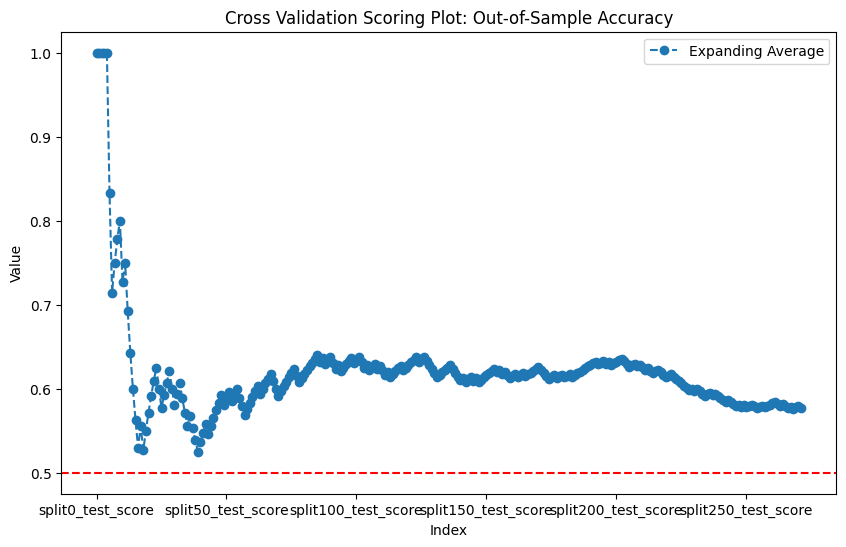

In [52]:
# plot your own learning curve

cv_perf = pd.DataFrame(cv_results.loc[6,"split0_test_score":'split271_test_score'])
cv_perf = cv_perf.rename(columns={6: 'score'})
cv_perf['Expanding_Average'] = cv_perf['score'].expanding().mean()
#cv_perf.reindex(X.index[(len(df6) - initial_train_size):])
# Plot the expanding average
plt.figure(figsize=(10, 6))
#plt.plot(cv_perf['Value'], label='Original Values', marker='o')
plt.plot(cv_perf['Expanding_Average'], label='Expanding Average', linestyle='--', marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Cross Validation Scoring Plot: Out-of-Sample Accuracy')
plt.legend()
# Show only every 10th tick on the x-axis
plt.xticks(cv_perf.index[::50])
plt.axhline(y=0.50, color='red', linestyle='--')

plt.show()


In [34]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve, train_test_split

# # Get the best estimator from the grid search
# best_gbm = grid_search.best_estimator_

# # Plot learning curve
# train_sizes, train_scores, test_scores = learning_curve(best_gbm, X_train, y_train, cv=tscv, scoring=make_scorer(accuracy_score), train_sizes=np.ones((len(df6) - initial_train_size)))

# # Calculate mean and standard deviation for training set scores and test set scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Plot the learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue', marker='o')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
# plt.plot(train_sizes, test_mean, label='Cross-validation accuracy', color='red', marker='o')
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

# # Add labels and legend
# plt.title('Learning Curve for GBM Classifier')
# plt.xlabel('Number of training examples')
# plt.ylabel('Accuracy')
# plt.legend(loc='best')

# # Show the plot
# plt.show()
